# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [33]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [6]:
df_raw.tail()


,admit,gre,gpa,prestige
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0
399,0,600.0,3.89,3.0


Answer: 400 rows of observations, with some null (1 in prestige, 2 in gpa and gre)

#### Question 2. Create a summary table

In [7]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because the range of GRE goes from 220 (in this case) to 800, whereas for GPA it can only vary from 1 to 4

#### Question 4. Drop data points with missing data


In [29]:
df_nonull = df_raw.dropna()

print df_raw.count()
df_nonull.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64


admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [30]:
df_nonull

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: when you look at the count of original file and null dropped file, the no null file has lower rows and the number of rows match fro all columns

In [31]:
print df_raw.count()
df_nonull.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64


admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

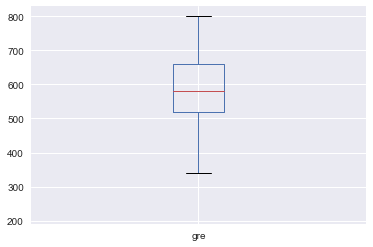

In [34]:
#boxplot 1
df_nonull['gre'].plot.box()

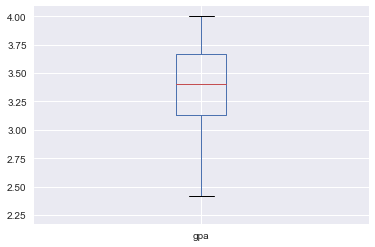

In [36]:
#boxplot 2 
df_nonull['gpa'].plot.box()

#### Question 7. What do this plots show?

Answer: The distribution of both gre and gpa are relatively normal with no outliers (graphing a histogram shows that they are actually slightly skewed but still normal for the most part)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1178a3190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118255bd0>]], dtype=object)

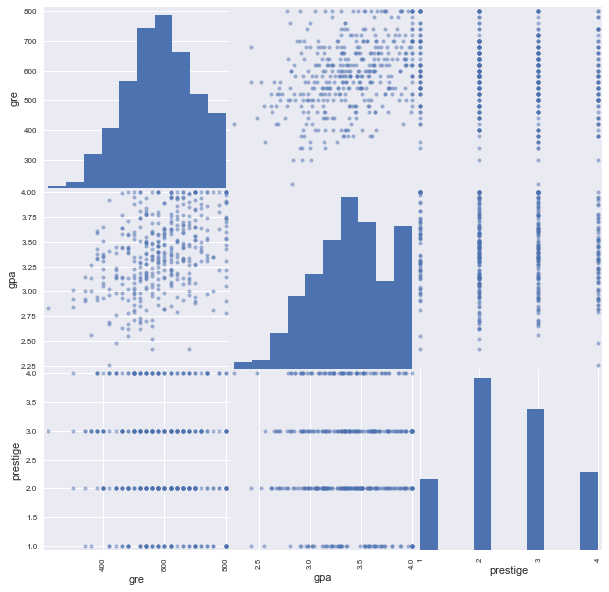

In [41]:
pd.scatter_matrix(df_nonull[['gre','gpa','prestige']],figsize=(10,10))

#### Question 8. Describe each distribution 

1. __admit__ (outcome) is binary

2. __gre__ is sufficiently normal because:
    - the plot looks normal
    - skew is -0.15 , ~ 0
    - kurtosis is -0.33, ~ 0
    - box plot shows no outliers
    
3. __gpa__ is sufficiently normal because:
    - the plot looks normal
    - skew is -0.22, close to 0
    - kurtosis is -0.56, close to 0
    - box plot shows no outliers
    
4. __prestige__ is sufficiently normal because:
    - histogram is approximately normal (discrete value so density doesn't look as good)
    - skew is -0.09, ~ 0 
    - kurtosis is -0.90, which is higher than others but still good enough

-0.146046988216
-0.332864354651


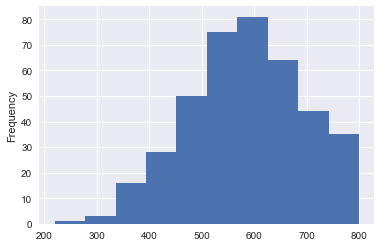

In [53]:
# plot the distribution of each variable 

print df_nonull['gre'].skew()
print df_nonull['gre'].kurt()
df_nonull['gre'].plot.hist()

-0.216888932969
-0.563569899522


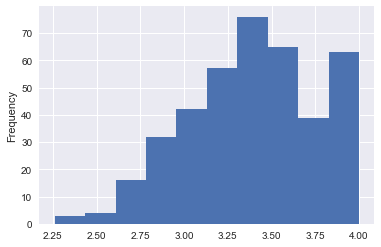

In [54]:
print df_nonull['gpa'].skew()
print df_nonull['gpa'].kurt()
df_nonull['gpa'].plot.hist()

0.0865055528971
-0.90103795489
Axes(0.125,0.125;0.775x0.755)


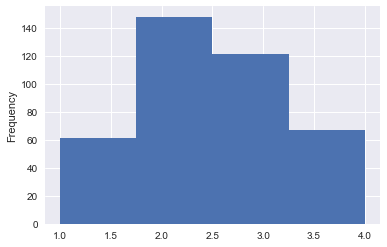

In [60]:
print df_nonull['prestige'].skew()
print df_nonull['prestige'].kurt()
print df_nonull['prestige'].plot.hist(bins=4)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: yes, because our features (gpa, gre, prestige) are all sufficiently normal based on the above

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes because even though prestige is is a normal distribution, it is categorical either being 1,2,3 or 4 and is not continuous, so you wouldn't be able to do linear regression. If you create dummies and make all values in cells 0 or 1, you can use logistic regression

#### Question 11. Which of our variables are potentially colinear? 

In [62]:
# create a correlation matrix for the data
df_nonull.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


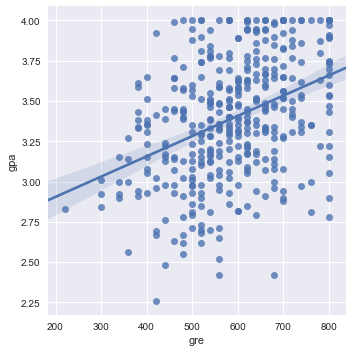

In [63]:
x = 'gre'
y = 'gpa'
sns.lmplot(x, y, df_nonull)

#### Question 12. What did you find?

Answer: because the R2 are not exactly 1 and are actually all much closer to zero, there is no colinearity

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1) Identify outcome
    - admission rates
2) Identify features
    - prestige
3) Identify null hypothesis
    - there is no relationship between grad school admission rates and prestige of undergraduate schools
4) Read data, remove nulls 
5) Assess assumptions, identify feature distributions. Normalize the features so it can be comparable. If categorical, create dummies and join to original dataframe
    - because prestige is categorical, create dummies to make 4 columns (and drop one) 
6) Because prestige is categorical, use Logistic Regression and fit models for Precision, Recall, and others
7) Use GridSearch to create a training set and test set, conduct cross validation, find the best model for each model using best_estimator
8) Create ROC AUC curve to identify best model
9) For this case, we aren't too concerned with precision focus or recall focus so we won't graph precision recall curve
    


#### Question 14. What is your hypothesis? 

Answer: the better the prestige (closer to 1) of undergraduate schools, the higher probability of admission to graduate school

## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?